<a href="https://colab.research.google.com/github/MichalBrodackiPJA/ZastosowaniaUczeniaMaszynowego/blob/main/ZUM_Projekt_Model_referencyjny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install datasets
!pip install nltk

In [ ]:
import pandas as pd
from datasets import load_dataset
import re
import nltk

In [ ]:
ds_political_tweets = load_dataset("Jacobvs/PoliticalTweets")

In [ ]:
df_political_tweets = pd.DataFrame(ds_political_tweets['train'])

In [ ]:
df_political_tweets.head(3)

,index,date,id,username,text,party,labels
0,0,2021-10-13 19:47:44,1448374915636383745,SenatorHassan,Happy th birthday to the @USNavy! The strength...,Democrat,1
1,1,2021-06-30 14:53:13,1410250073003462656,SenatorMenendez,The greatest generation's investment in infras...,Democrat,1
2,2,2021-08-08 01:11:29,1424176405881966599,SenBillCassidy,"Thanks to @SenTedCruz and @SenatorWarnock, th...",Republican,0


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

df_political_tweets_preapared = df_political_tweets.copy()

# Remove stopwords
stop_words = set(stopwords.words('english'))
df_political_tweets_preapared['text'] = df_political_tweets_preapared['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Remove links
df_political_tweets_preapared['text'] = df_political_tweets_preapared['text'].apply(lambda x: re.sub(r'http\S+', '', x))


# Remove columns: index, date, id, username, party
df_political_tweets_preapared = df_political_tweets_preapared.drop(['index', 'date', 'id', 'username', 'party'], axis=1, errors='ignore')


df_political_tweets_preapared.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,labels
0,"Happy th birthday @USNavy! strength, dedicatio...",1
1,greatest generation's investment infrastructur...,1
2,"Thanks @SenTedCruz @SenatorWarnock, Infrastruc...",0
3,/ get lasting change cant lock convicted crime...,1
4,Today celebrating years Hoosier state. Happy b...,0


In [ ]:
#przykład tekstu po usunięciu linka na końcu
print('przed usunieciem linka: \n' + df_political_tweets['text'][0])
print('po usunieciu linka: \n' + df_political_tweets_preapared['text'][0])

przed usunieciem linka: 
Happy th birthday to the @USNavy! The strength, dedication, and skill of our Sailors including those at Portsmouth Naval Shipyard help keep this country safe, secure, and free. Today we recognize and celebrate their incredible service. #246NavyBirthday https://t.co/GuHEDMApke
po usunieciu linka: 
Happy th birthday @USNavy! strength, dedication, skill Sailors including Portsmouth Naval Shipyard help keep country safe, secure, free. Today recognize celebrate incredible service. #246NavyBirthday 


In [ ]:
for n in df_political_tweets_preapared:
  df_political_tweets_preapared['TweetLength']=df_political_tweets_preapared['text'].str.len()

In [ ]:
df_political_tweets_preapared.head(20)

,text,labels,TweetLength
0,"Happy th birthday @USNavy! strength, dedicatio...",1,200
1,greatest generation's investment infrastructur...,1,195
2,"Thanks @SenTedCruz @SenatorWarnock, Infrastruc...",0,184
3,/ get lasting change cant lock convicted crime...,1,214
4,Today celebrating years Hoosier state. Happy b...,0,63
5,#ForthePeopleAct includes reforms popular Amer...,1,188
6,"Todays strong, bipartisan vote beginningI'm go...",1,114
7,Supporting crime victims requires holding crim...,0,209
8,Louisiana know natural disasters change lives....,0,123
9,Today start anew.,1,17


In [ ]:
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

def lemmatize_and_tokenize_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc]

df_political_tweets_preapared['text_lemmatized_tokenized'] = df_political_tweets_preapared['text'].apply(lambda x: lemmatize_and_tokenize_text(x))


In [ ]:
df_political_tweets_preapared

,text,labels,TweetLength,text_lemmatized_tokenized
0,"Happy th birthday @USNavy! strength, dedicatio...",1,200,"[happy, th, birthday, @USNavy, !, strength, ,,..."
1,greatest generation's investment infrastructur...,1,195,"[great, generation, 's, investment, infrastruc..."
2,"Thanks @SenTedCruz @SenatorWarnock, Infrastruc...",0,184,"[thank, @sentedcruz, @senatorwarnock, ,, Infra..."
3,/ get lasting change cant lock convicted crime...,1,214,"[/, get, last, change, can, not, lock, convict..."
4,Today celebrating years Hoosier state. Happy b...,0,63,"[today, celebrate, year, hoosier, state, ., ha..."
...,...,...,...,...
190486,Religious liberty foundational America. appall...,0,96,"[religious, liberty, foundational, America, .,..."
190487,"#NationalPoliceWeek, want give heartfelt thank...",0,76,"[#, nationalpoliceweek, ,, want, give, heartfe..."
190488,"week gas prices hit record high, Biden adminis...",0,89,"[week, gas, price, hit, record, high, ,, Biden..."
190489,Amid another mounting crisis—a nationwide shor...,0,100,"[amid, another, mount, crisis, —, a, nationwid..."


In [ ]:
def remove_single_special_chars(tokens):
  return [token for token in tokens if not (len(token) == 1 and not token.isalnum())]

df_political_tweets_preapared['text_lemmatized_tokenized_Without_single_chars'] = df_political_tweets_preapared['text_lemmatized_tokenized'].apply(remove_single_special_chars)

In [ ]:
df_political_tweets_preapared.head(15)

,text,labels,TweetLength,text_lemmatized_tokenized,text_lemmatized_tokenized_Without_single_chars
0,"Happy th birthday @USNavy! strength, dedicatio...",1,200,"[happy, th, birthday, @USNavy, !, strength, ,,...","[happy, th, birthday, @USNavy, strength, dedic..."
1,greatest generation's investment infrastructur...,1,195,"[great, generation, 's, investment, infrastruc...","[great, generation, 's, investment, infrastruc..."
2,"Thanks @SenTedCruz @SenatorWarnock, Infrastruc...",0,184,"[thank, @sentedcruz, @senatorwarnock, ,, Infra...","[thank, @sentedcruz, @senatorwarnock, Infrastr..."
3,/ get lasting change cant lock convicted crime...,1,214,"[/, get, last, change, can, not, lock, convict...","[get, last, change, can, not, lock, convict, c..."
4,Today celebrating years Hoosier state. Happy b...,0,63,"[today, celebrate, year, hoosier, state, ., ha...","[today, celebrate, year, hoosier, state, happy..."
5,#ForthePeopleAct includes reforms popular Amer...,1,188,"[#, forthepeopleact, include, reform, popular,...","[forthepeopleact, include, reform, popular, Am..."
6,"Todays strong, bipartisan vote beginningI'm go...",1,114,"[today, strong, ,, bipartisan, vote, beginning...","[today, strong, bipartisan, vote, beginningi'm..."
7,Supporting crime victims requires holding crim...,0,209,"[support, crime, victim, require, hold, crime,...","[support, crime, victim, require, hold, crime,..."
8,Louisiana know natural disasters change lives....,0,123,"[Louisiana, know, natural, disaster, change, l...","[Louisiana, know, natural, disaster, change, l..."
9,Today start anew.,1,17,"[today, start, anew, .]","[today, start, anew]"


Dać w READme dostep odnośnik do tego CSV, że w nim są dane, w ewaluacji napisać, że podzieliliśmy dane, na zbiór treningowy, walidacyjny i testowy i musze to zrobić w tym notatniku

In [ ]:
df_political_tweets_preapared = df_political_tweets_preapared.drop(['text'], axis=1, errors='ignore')

df_political_tweets_preapared.to_csv("Tweets_Prepared.csv", index=False, encoding="utf-8")

In [ ]:
df_political_tweets_preapared_loaded = pd.read_csv("Tweets_Prepared.csv")
df_political_tweets_preapared_loaded.head(15)

,labels,TweetLength,text_lemmatized_tokenized,text_lemmatized_tokenized_Without_single_chars
0,1,200,"['happy', 'th', 'birthday', '@USNavy', '!', 's...","['happy', 'th', 'birthday', '@USNavy', 'streng..."
1,1,195,"['great', 'generation', ""'s"", 'investment', 'i...","['great', 'generation', ""'s"", 'investment', 'i..."
2,0,184,"['thank', '@sentedcruz', '@senatorwarnock', ',...","['thank', '@sentedcruz', '@senatorwarnock', 'I..."
3,1,214,"['/', 'get', 'last', 'change', 'can', 'not', '...","['get', 'last', 'change', 'can', 'not', 'lock'..."
4,0,63,"['today', 'celebrate', 'year', 'hoosier', 'sta...","['today', 'celebrate', 'year', 'hoosier', 'sta..."
5,1,188,"['#', 'forthepeopleact', 'include', 'reform', ...","['forthepeopleact', 'include', 'reform', 'popu..."
6,1,114,"['today', 'strong', ',', 'bipartisan', 'vote',...","['today', 'strong', 'bipartisan', 'vote', ""beg..."
7,0,209,"['support', 'crime', 'victim', 'require', 'hol...","['support', 'crime', 'victim', 'require', 'hol..."
8,0,123,"['Louisiana', 'know', 'natural', 'disaster', '...","['Louisiana', 'know', 'natural', 'disaster', '..."
9,1,17,"['today', 'start', 'anew', '.']","['today', 'start', 'anew']"


In [ ]:
df_political_tweets_preapared = df_political_tweets_preapared[df_political_tweets_preapared["TweetLength" ] > 1]
# Zostawienie tylko kolumn 'labels' oraz 'text_lemmatized_tokenized_Without_single_chars'
df_filtered = df_political_tweets_preapared[['labels', 'text_lemmatized_tokenized_Without_single_chars']]

# Zmiana nazwy kolumny 'text_lemmatized_tokenized_Without_single_chars' na 'text'
df_filtered.rename(columns={'text_lemmatized_tokenized_Without_single_chars': 'text'}, inplace=True)

# Wyświetlenie pierwszych wierszy DataFrame
df_filtered.head()

<ipython-input-40-4e010869034c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'text_lemmatized_tokenized_Without_single_chars': 'text'}, inplace=True)


,labels,text
0,1,"[happy, th, birthday, @USNavy, strength, dedic..."
1,1,"[great, generation, 's, investment, infrastruc..."
2,0,"[thank, @sentedcruz, @senatorwarnock, Infrastr..."
3,1,"[get, last, change, can, not, lock, convict, c..."
4,0,"[today, celebrate, year, hoosier, state, happy..."


In [ ]:
df = df_filtered
df.to_csv("Tweets_Prepared.csv", index=False, encoding="utf-8")

In [ ]:
df_loaded = pd.read_csv("Tweets_Prepared.csv")
df_loaded.head(15)

,labels,text
0,1,"['happy', 'th', 'birthday', '@USNavy', 'streng..."
1,1,"['great', 'generation', ""'s"", 'investment', 'i..."
2,0,"['thank', '@sentedcruz', '@senatorwarnock', 'I..."
3,1,"['get', 'last', 'change', 'can', 'not', 'lock'..."
4,0,"['today', 'celebrate', 'year', 'hoosier', 'sta..."
5,1,"['forthepeopleact', 'include', 'reform', 'popu..."
6,1,"['today', 'strong', 'bipartisan', 'vote', ""beg..."
7,0,"['support', 'crime', 'victim', 'require', 'hol..."
8,0,"['Louisiana', 'know', 'natural', 'disaster', '..."
9,1,"['today', 'start', 'anew']"


In [19]:
df_political_tweets_preapared = df_loaded

In [ ]:
from collections import Counter

def drop_rare_tokens(df, column_name, num_tokens_to_drop):
    all_tokens = []
    for tokens in df[column_name]:
          all_tokens.extend(tokens)

    token_counts = Counter(all_tokens)
    rare_tokens = sorted(token_counts, key=token_counts.get)[:num_tokens_to_drop]

    def remove_rare_tokens_from_text(text):
        return [token for token in text if token not in rare_tokens]
    print(all_tokens)
    print(rare_tokens)
    #df[column_name] = df[column_name].apply(remove_rare_tokens_from_text)
    #return df

df_political_tweets_preapared = drop_rare_tokens(df_political_tweets_preapared, 'text', 500)

Buffered data was truncated after reaching the output size limit.

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential, Model
from keras import layers

from sklearn.model_selection import train_test_split

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np

In [32]:
max_words = 4000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
texts = df_political_tweets_preapared.text.to_list()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index), end='\n\n')

data = pad_sequences(sequences, maxlen=100)
print(data)
print(word_index)

Found 85080 unique tokens

[[   0    0    0 ...  118  531   78]
 [   0    0    0 ...   60   28  158]
 [   0    0    0 ...  226  366   60]
 ...
 [   0    0    0 ... 2722 1691 1092]
 [   0    0    0 ...   31    5  881]
 [   0    0    0 ... 2618  567 1433]]
{"'": 1, "'today'": 2, "'i'": 3, "'work'": 4, "'biden'": 5, "'make'": 6, "'year'": 7, "'family'": 8, "'need'": 9, "'american'": 10, "'get'": 11, "'be'": 12, "'s": 13, "'help'": 14, "'act'": 15, "'not'": 16, "'people'": 17, "'bill'": 18, "'day'": 19, "'community'": 20, "'we'": 21, "'’s'": 22, "'new'": 23, "'support'": 24, "'join'": 25, "'one'": 26, "'thank'": 27, "'time'": 28, "'must'": 29, "'state'": 30, "'president'": 31, "'great'": 32, "'americans'": 33, "'right'": 34, "'pass'": 35, "'health'": 36, "'country'": 37, "'continue'": 38, "'proud'": 39, "'take'": 40, "'protect'": 41, "'senate'": 42, "'border'": 43, "'honor'": 44, "'care'": 45, "'see'": 46, "'week'": 47, "'m'": 48, "'congress'": 49, "'vote'": 50, "'good'": 51, "'u": 52, "'l

In [33]:
import json

# Save word index to a JSON file
with open("word_index.json", "w") as f:
    json.dump(word_index, f)

print("Word index saved to word_index.json!")

Word index saved to word_index.json!


In [35]:
import json

# Load word index from a JSON file
with open("word_index.json", "r") as f:
    word_index = json.load(f)

print("Loaded word index:", len(word_index), "words")
print(word_index)

Loaded word index: 85080 words
{"'": 1, "'today'": 2, "'i'": 3, "'work'": 4, "'biden'": 5, "'make'": 6, "'year'": 7, "'family'": 8, "'need'": 9, "'american'": 10, "'get'": 11, "'be'": 12, "'s": 13, "'help'": 14, "'act'": 15, "'not'": 16, "'people'": 17, "'bill'": 18, "'day'": 19, "'community'": 20, "'we'": 21, "'’s'": 22, "'new'": 23, "'support'": 24, "'join'": 25, "'one'": 26, "'thank'": 27, "'time'": 28, "'must'": 29, "'state'": 30, "'president'": 31, "'great'": 32, "'americans'": 33, "'right'": 34, "'pass'": 35, "'health'": 36, "'country'": 37, "'continue'": 38, "'proud'": 39, "'take'": 40, "'protect'": 41, "'senate'": 42, "'border'": 43, "'honor'": 44, "'care'": 45, "'see'": 46, "'week'": 47, "'m'": 48, "'congress'": 49, "'vote'": 50, "'good'": 51, "'u": 52, "'life'": 53, "'nation'": 54, "'do'": 55, "'amp'": 56, 's': 57, "'democrats'": 58, "'last'": 59, "'infrastructure'": 60, "'house'": 61, "'fight'": 62, "'go'": 63, "'job'": 64, "'bipartisan'": 65, "'across'": 66, "'crisis'": 67,

Dekoder poniżej dla tekstu :)

In [31]:
import numpy as np

# Reverse the word index
reverse_word_index = {value: key for key, value in tokenizer.word_index.items()}

# Function to decode a single sequence
def decode_sequence(sequence):
    return " ".join([reverse_word_index.get(num, "") for num in sequence if num > 0])

# Decode the first padded sequence as an example
decoded_text = decode_sequence(data[0])
print("Decoded text:", decoded_text)


Decoded text: 'happy' 'th' 'birthday' ' usnavy' 'strength' 'dedication' 'skill' 'include' 'naval' 'shipyard' 'help' 'keep' 'country' 'safe' 'secure' 'free' 'today' 'recognize' 'celebrate' 'incredible' 'service'


In [21]:
labels = to_categorical(df_political_tweets_preapared.labels, num_classes=2)

In [22]:
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy (70%) i tymczasowy (30%)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)

# Podział zbioru tymczasowego na walidacyjny (20%) i testowy (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(132421, 100)
(132421, 2)
(37834, 100)
(37834, 2)
(18918, 100)
(18918, 2)


In [38]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_val.npy", X_val)
np.save("y_val.npy", y_val)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

In [ ]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [26]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [39]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2025-01-09 13:20:56--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-09 13:20:56--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.92MB/s    in 2m 55s  

2025-01-09 13:23:52 (4.70 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [40]:
from zipfile import ZipFile
with ZipFile('glove.6B.zip', 'r') as z:
  z.extractall()

In [41]:
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print(f'Loaded {len(embeddings_index)} word vectors.')

Loaded 400000 word vectors.


In [42]:
vocab = tokenizer.sequences_to_texts(texts)
vocab_size = len(tokenizer.word_index) + 1 # Dodajemy 1 bo indeks 0 jest już zarezerwowany
print(vocab_size)

# tworzymy macierz
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

85081


In [43]:
model = Sequential()

model.add(layers.Input(shape=(max_len,), dtype='int32', name='text_input'))
model.add(layers.Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=max_len, trainable=True))
model.add(layers.Flatten())
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │       8,508,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       1,000,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,511,498 (36.28 MB)

 Trainable params: 9,511,498 (36.28 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=32,
          verbose=True,
          validation_data=(X_val, y_val))

Epoch 1/5
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8808 - loss: 0.2639 - val_accuracy: 0.7820 - val_loss: 0.4962
Epoch 2/5
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9047 - loss: 0.2128 - val_accuracy: 0.7786 - val_loss: 0.5841
Epoch 3/5
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9222 - loss: 0.1735 - val_accuracy: 0.7698 - val_loss: 0.7110
Epoch 4/5
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9360 - loss: 0.1412 - val_accuracy: 0.7666 - val_loss: 0.8395
Epoch 5/5
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9504 - loss: 0.1117 - val_accuracy: 0.7646 - val_loss: 1.1452


In [47]:
!pip install plot_keras_history

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.5/324.5 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.39-py3-none-any.whl size=10667 sha256=3af874c6de161ec75f9dffe87da2e555cf1cc617cfec3c206c30804e409f4247
  Stored in directory: /root/.cache/pip/wheels/6d/89/e0/6781cca14c32fdba8e81404d9f09e1be1436deee5377160507
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.1.4-py3-none-any.whl size=324285 sha256=bcdac96950db7acd3eaa1beba771ac402c6b7db5a6b23906d44b570776e094f9
  Stored in directory: /root/.cache/pip/wheels/cc/37/0c/923ffeccf1ed550f523bb269e185103538592636861a48b84f
  Created wheel for compress-json: filename=compress_json-1.1.1-py3-none-any.whl size=6599 sha256=25bea641f6add8c59d2efd2fb06d20c7ec35e075ce17974757b9c792be01e883
  Stored in directory: /root/.cache/pip/wheels/41/5b/81/3d4b79d6340f

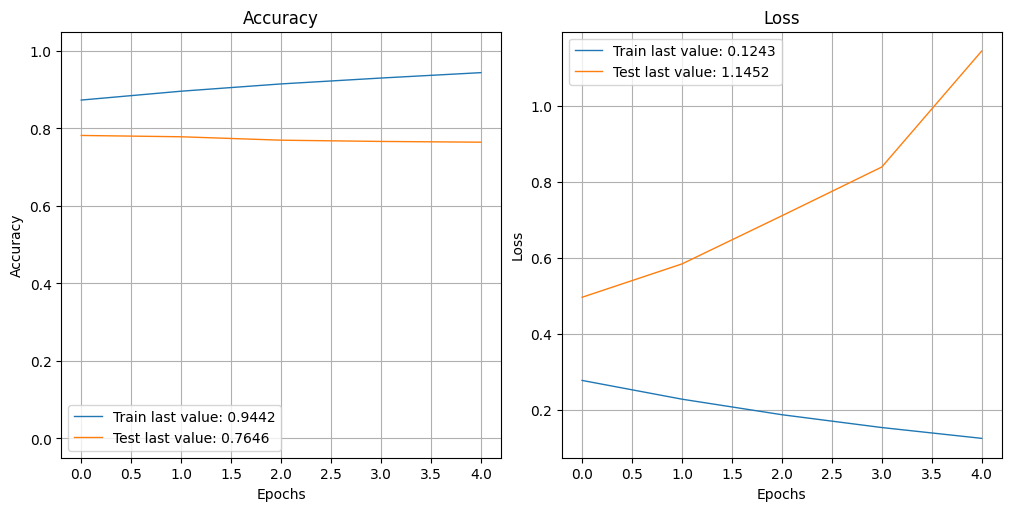

In [48]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history)
plt.close()

In [50]:
# Save the model as a .h5 file
model.save("my_model.keras")

print("Model saved to my_model.keras!")

Model saved to my_model.keras!


In [51]:
from tensorflow.keras.models import load_model

# Load the model from the .keras file
model = load_model("my_model.keras")

print("Model loaded successfully!")

Model loaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │       8,508,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       1,000,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,022,998 (72.57 MB)

 Trainable params: 9,511,498 (36.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,511,500 (36.28 MB)

In [53]:
# Predict probabilities for X_test
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print predictions
print("Predicted labels:", y_pred.flatten())

592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Predicted labels: [0 1 1 ... 0 0 1]


In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      9169
           1       0.77      0.76      0.77      9749

   micro avg       0.76      0.76      0.76     18918
   macro avg       0.76      0.76      0.76     18918
weighted avg       0.76      0.76      0.76     18918
 samples avg       0.76      0.76      0.76     18918



In [56]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# Convert the predicted probabilities to binary labels (for multi-label classification)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate F1 Score (average for multi-label classification)
f1 = f1_score(y_test, y_pred, average="macro")
print(f"F1 Score: {f1:.2f}")

# Calculate ROC AUC Score (if using multi-label classification)
roc_auc = roc_auc_score(y_test, y_pred, average="macro", multi_class="ovr")
print(f"ROC AUC Score: {roc_auc:.2f}")

# If you still want a confusion matrix, you can compute it label by label (but may require some additional processing)
cm = confusion_matrix(y_test.flatten(), y_pred.flatten())
print("Confusion Matrix:")
print(cm)


F1 Score: 0.76
ROC AUC Score: 0.76
Confusion Matrix:
[[14443  4475]
 [ 4475 14443]]


Model jest zipowany, bo zajmuje za dużo przestrzeni dla Githuba

In [59]:
import zipfile

# Zapisz model jako zip
with zipfile.ZipFile('model.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('my_model.keras')

In [60]:
import zipfile

# Ścieżka do pliku ZIP
zip_file = 'model.zip'

# Ścieżka, gdzie chcesz rozpakować plik
output_dir = 'unzipped_model/'

# Rozpakowanie pliku ZIP
with zipfile.ZipFile(zip_file, 'r') as zipf:
    zipf.extractall(output_dir)

print(f"Model został rozpakowany do folderu: {output_dir}")

Model został rozpakowany do folderu: unzipped_model/
